Code implementation are mainly inspired by this video: 
https://www.youtube.com/watch?v=MVsKaYzEggY


In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

In [2]:
# Load CSV into pandas DataFrame
df = pd.read_csv('merged_data.csv')

# Print the data
df.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Volume,Prev_Close,Weekday,...,FTSE 100,DAX,S&P500,Hang Seng Index,NASDAQ,Nikkei 225,Market Volatility,CPI,USD Index,Retail Sales
0,2014-01-06,40.480000,40.590000,40.160000,40.270000,30.012405,11036300.0,10403400.0,40.459999,1.0,...,6730.700195,9428.000000,1826.770020,22684.150391,4113.680176,15908.879883,13.550000,233.916,93.9109,373327.0
1,2014-01-07,40.480000,40.720001,40.290001,40.389999,30.101828,11872300.0,11036300.0,40.270000,2.0,...,6755.500000,9506.200195,1837.880005,22712.779297,4153.180176,15814.370117,12.920000,233.916,94.0398,373327.0
2,2014-01-08,40.439999,40.439999,39.830002,39.939999,29.766455,15339600.0,11872300.0,40.389999,3.0,...,6721.799805,9497.839844,1837.489990,22996.589844,4165.609863,16121.450195,12.870000,233.916,94.2181,373327.0
3,2014-01-09,39.950001,40.000000,39.520000,39.730000,29.609943,14070200.0,15339600.0,39.939999,4.0,...,6691.299805,9421.610352,1838.130005,22787.330078,4156.189941,15880.330078,12.890000,233.916,94.3299,373327.0
4,2014-01-10,39.959999,40.290001,39.900002,40.130001,29.908060,13290000.0,14070200.0,39.730000,5.0,...,6739.899902,9473.240234,1842.369995,22846.250000,4174.669922,15912.059570,12.140000,233.916,94.0045,373327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,2022-12-15,63.590000,63.889999,62.490002,63.110001,62.629601,12212300.0,12826700.0,63.990002,4.0,...,7426.200195,13986.230469,3895.750000,19368.589844,10810.530273,28051.699219,22.830000,296.797,122.5201,589030.0
1961,2022-12-16,62.750000,63.139999,62.330002,62.750000,62.272339,33631500.0,12212300.0,63.110001,5.0,...,7332.100098,13893.070312,3852.360107,19450.669922,10705.410156,27527.119141,22.620001,296.797,122.6127,589030.0
1962,2022-12-19,62.830002,63.410000,62.470001,62.840000,62.361656,10919700.0,33631500.0,62.750000,1.0,...,7361.299805,13942.870117,3817.659912,19352.810547,10546.030273,27237.640625,22.420000,296.797,122.5102,589030.0
1963,2022-12-20,62.820000,63.150002,62.750000,62.790001,62.312038,10286500.0,10919700.0,62.840000,2.0,...,7370.600098,13884.660156,3821.620117,19094.800781,10547.110352,26568.029297,21.480000,296.797,122.1117,589030.0


In [3]:
# Set the 'Date' column as the index of the DataFrame
df2 =df.set_index('Date')
# Extract the 'Close' price values as a list
data = df2["Close"]

In [4]:
# Extract the 'Close' price values as a list
#data = list(df2["Close"])

# Stationarity

The minimum number of diferencing operations needed to make the series stationary needs to be imputed into our ARIMA model.

### ADF test

Augumented Dickey Fuller (ADF) test was used to check if the price series is stationary.

The null hypothesis of the ADF testis that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

In our case, if the p-value > 0.05 we'll need to find the order of differencing

In [5]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.2383123986724371
p-value: 0.6569014655022176


Since p-value= >0.05, we conclude our data is not stationary

## Manually choosing p,d,q

Making data stationary

Text(0.5, 1.0, 'Stock Data')

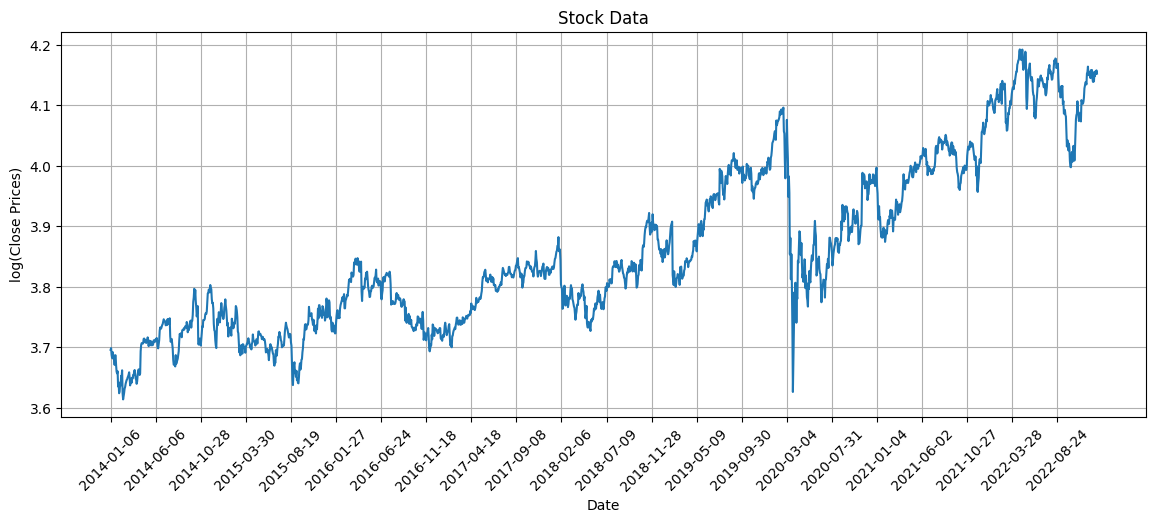

In [6]:
#Lets try transformation
plt.figure(figsize=(14,5))
fig = plt.figure(1)

import numpy as np
data_log = np.log(data)
plt.plot(data_log)
plt.xticks(range(0, df.shape[0],3*30), df['Date'].loc[::3*30],rotation=45)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('log(Close Prices)')
plt.title('Stock Data')

Text(0.5, 0, 'Date')

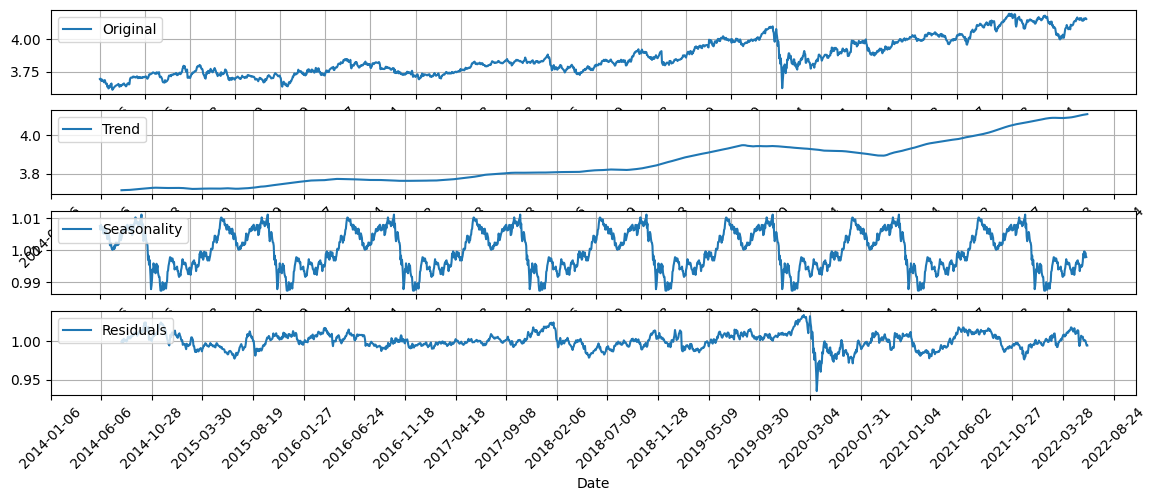

In [7]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log,period=252,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14,5))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='upper left')
plt.xticks(range(0, df.shape[0],3*30), df['Date'].loc[::3*30],rotation=45)
plt.grid(True)
plt.xlabel('Date')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.xticks(range(0, df.shape[0],3*30), df['Date'].loc[::3*30],rotation=45)
plt.grid(True)
plt.xlabel('Date')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.xticks(range(0, df.shape[0],3*30), df['Date'].loc[::3*30],rotation=45)
plt.grid(True)
plt.xlabel('Date')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.xticks(range(0, df.shape[0],3*30), df['Date'].loc[::3*30],rotation=45)
plt.grid(True)
plt.xlabel('Date')

In [8]:
#Lets try differencing once
data_log_diff = data_log - data_log.shift()
data_log_diff.dropna(inplace=True)
#Determing rolling statistics
rolLmean = data_log_diff.rolling(12).mean()
rolLstd = data_log_diff.rolling(12).std()

result = adfuller(data_log_diff)
print(f"ADP Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADP Statistic: -12.232682781064838
p-value: 1.0449091626788009e-22


p-value is < 0.05 now so we can verify that our transformed data is stationary

In [9]:
data.sort_index(inplace= True)

In [10]:
#Plotting ACF, PACF graphs
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_log_diff, nlags=20)
lag_pacf = pacf(data_log_diff, nlags=20)

C:\Users\jz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


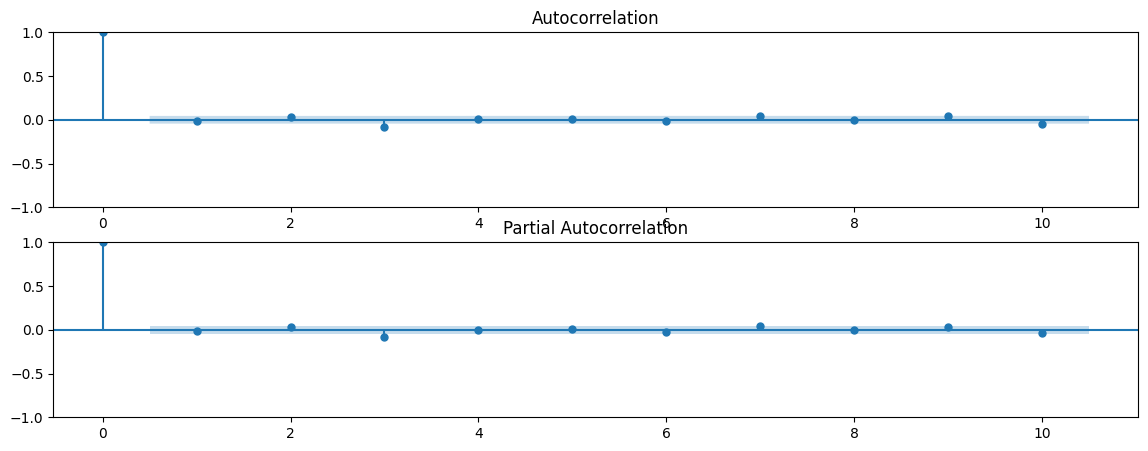

In [11]:
import statsmodels.api as sm
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_log_diff.dropna(),lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_log_diff.dropna(),lags=10,ax=ax2)

Observing from the graphs, we could infer the optimal p is 3 and q is 3. 

In [12]:
# Split the data into 80% training and 20% testing
train_size = int(len(data_log_diff) * 0.8)
train_data = data_log_diff[:train_size]
test_data = data_log_diff[train_size:]

In [13]:
!pip install -U statsmodels --quiet
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(3,0,3))  
results_ARIMA = model.fit()  
# Apply the model to the test data
test_results = results_ARIMA.apply(test_data)

C:\Users\jz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
fitted_values = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(fitted_values.head())
predicted_values = pd.Series(test_results.fittedvalues, copy=True)
print(predicted_values.head())

Date
2014-01-07    0.000150
2014-01-08    0.000056
2014-01-09    0.000598
2014-01-10   -0.000225
2014-01-14    0.000765
dtype: float64
Date
2021-03-18    0.000150
2021-03-19    0.000592
2021-03-22   -0.000382
2021-03-23    0.001297
2021-03-24   -0.000672
dtype: float64


In [15]:
# Combine the fitted and predicted values
combined_values = pd.concat([fitted_values, predicted_values])

# Calculate the cumulative sum of the combined values
combined_values_cumsum = combined_values.cumsum()

# Add the cumulative sum to the first log value to obtain the log predictions
ARIMA_log_prediction = pd.Series(data_log.iloc[0], index=data_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(combined_values_cumsum, fill_value=0)

# Convert the log predictions back to the original scale
predictions_ARIMA = np.exp(ARIMA_log_prediction)

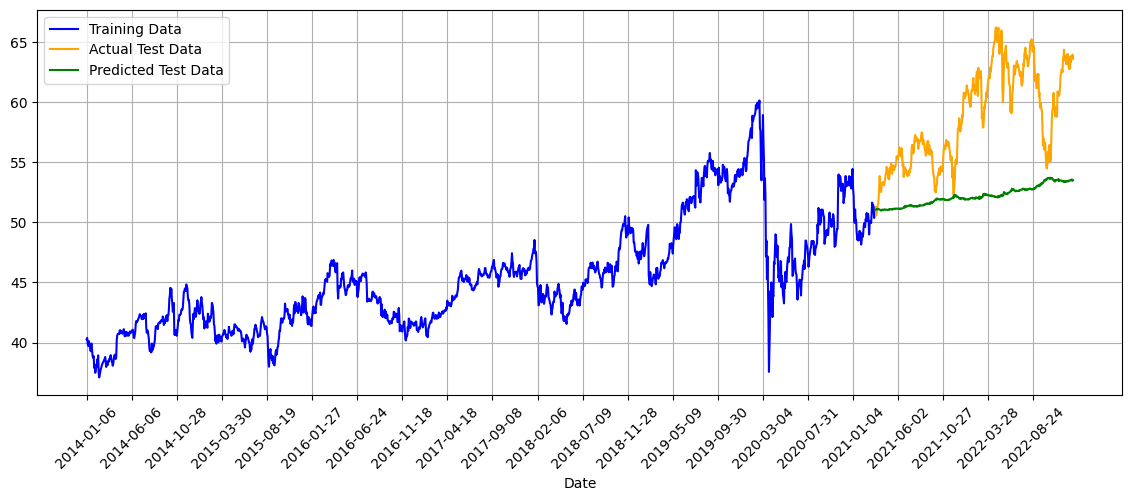

In [16]:
# Plot the original data and the predictions
plt.figure(figsize=(14, 5))
plt.plot(data[:train_size], label='Training Data', color='blue')
plt.plot(data[train_size:], label='Actual Test Data', color='orange')
plt.plot(predictions_ARIMA[train_size:], label='Predicted Test Data', color='green')
plt.legend()
plt.xticks(range(0, df.shape[0],3*30), df['Date'].loc[::3*30],rotation=45)
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
# Calculate the RMSE for the train data
train_data_original_scale = np.exp(data_log[:train_size])
train_predictions_original_scale = np.exp(ARIMA_log_prediction[:train_size])
print(len(train_data_original_scale))
print(len(train_predictions_original_scale))
# Compute the root mean squared error (RMSE) of the train data
train_error = np.sqrt(mean_squared_error(train_data_original_scale, train_predictions_original_scale))
print(f"Train RMSE: {train_error:.4f}")

# Calculate the RMSE for the test data
test_data_original_scale = np.exp(data_log[train_size:])
test_predictions_original_scale = np.exp(ARIMA_log_prediction[train_size:])
# Compute the root mean squared error (RMSE) of the test data
test_error = np.sqrt(mean_squared_error(test_data_original_scale, test_predictions_original_scale))
print(f"Test RMSE: {test_error:.4f}")

1575
1575
Train RMSE: 2.9174
Test RMSE: 7.4582


## Using auto_ARIMA() function

In [18]:
!pip install pmdarima --quiet
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel
arimamodel(data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3626.370, Time=5.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13223.386, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10739.011, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20884.757, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3629.304, Time=0.96 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3628.169, Time=6.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3623.745, Time=7.55 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3626.975, Time=3.96 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=3623.201, Time=3.59 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3621.646, Time=4.44 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=3619.145, Time=8.20 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=362

ARIMA(order=(5, 0, 1), scoring_args={}, suppress_warnings=True)

In [19]:
from statsmodels.tsa.arima.model import ARIMA
model_auto = ARIMA(train_data, order=(5,0,1))  
results_ARIMA_auto = model_auto.fit()  
# Apply the model to the test data
test_results_auto = results_ARIMA_auto.apply(test_data)

C:\Users\jz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
fitted_values_auto = pd.Series(results_ARIMA_auto.fittedvalues, copy=True)
print(fitted_values_auto.head())
predicted_values_auto = pd.Series(test_results_auto.fittedvalues, copy=True)
print(predicted_values_auto.head())
# Combine the fitted and predicted values
combined_values_auto = pd.concat([fitted_values_auto, predicted_values_auto])

# Calculate the cumulative sum of the combined values
combined_values_auto_cumsum = combined_values_auto.cumsum()

# Add the cumulative sum to the first log value to obtain the log predictions
ARIMA_log_prediction_auto = pd.Series(data_log.iloc[0], index=data_log.index)
ARIMA_log_prediction_auto = ARIMA_log_prediction_auto.add(combined_values_auto_cumsum, fill_value=0)

# Convert the log predictions back to the original scale
predictions_ARIMA_auto = np.exp(ARIMA_log_prediction_auto)

Date
2014-01-07    0.000150
2014-01-08    0.000054
2014-01-09    0.000606
2014-01-10   -0.000221
2014-01-14    0.000687
dtype: float64
Date
2021-03-18    0.000150
2021-03-19    0.000602
2021-03-22   -0.000387
2021-03-23    0.001286
2021-03-24   -0.000449
dtype: float64


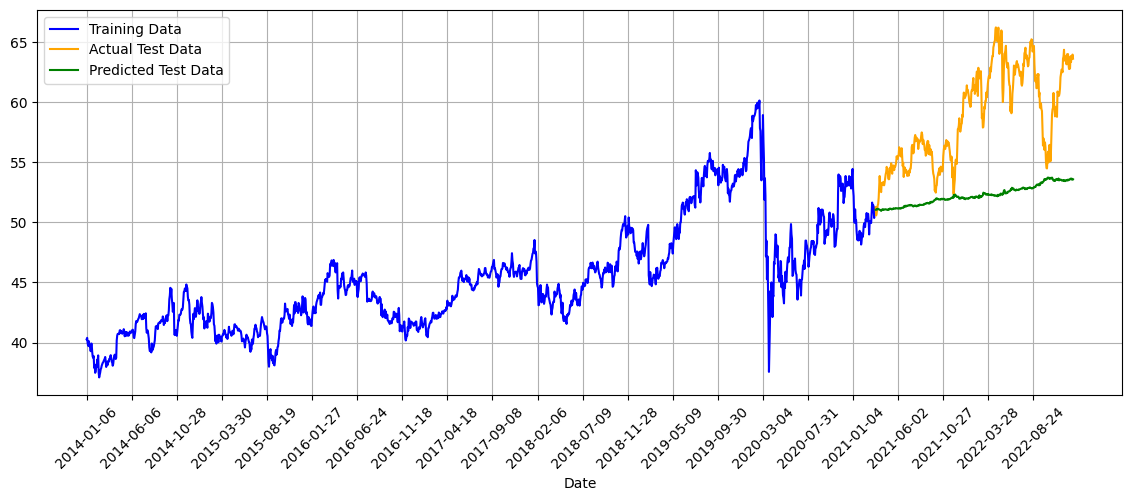

In [21]:
# Plot the original data and the predictions
plt.figure(figsize=(14, 5))
plt.plot(data[:train_size], label='Training Data', color='blue')
plt.plot(data[train_size:], label='Actual Test Data', color='orange')
plt.plot(predictions_ARIMA_auto[train_size:], label='Predicted Test Data', color='green')
plt.legend()
plt.xticks(range(0, df.shape[0],3*30), df['Date'].loc[::3*30],rotation=45)
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [22]:
# Calculate the RMSE for the train data
train_data_original_scale = np.exp(data_log[:train_size])
train_predictions_original_scale_auto = np.exp(ARIMA_log_prediction_auto[:train_size])

train_error = np.sqrt(mean_squared_error(train_data_original_scale, train_predictions_original_scale_auto))
print(f"Train RMSE: {train_error:.4f}")

# Calculate the RMSE for the test data
test_data_original_scale = np.exp(data_log[train_size:])
test_predictions_original_scale_auto = np.exp(ARIMA_log_prediction_auto[train_size:])
# Compute the root mean squared error (RMSE) of the test data
test_error = np.sqrt(mean_squared_error(test_data_original_scale, test_predictions_original_scale_auto))
print(f"Test RMSE: {test_error:.4f}")

Train RMSE: 2.8929
Test RMSE: 7.3977
